#  Rent or Buy Analysis: Price-to-Rent (P/R) Ratio

## 1. Introduction

"Should I buy or should I rent?" is a common question one ask when moving into their first home or downsizing? Home ownership can represent personal success and stability for some or represent an expensive anchor that reduce travel and relocaion for others. Since 2012, home values have recovered from the 2007 Great Recession that originiated from the subprime mortgage crash. Today, it is difficult to determine whether homes values are relative bargains or overpriced money traps. One popular metric to consider in the decision-making process is to reference the Price-to-Rent (P/R) ratio.

We use the following equation to calculate the Price-to-Rent (P/R) ratio:<br>

<i>P/R ratio = median home sales ÷ median rent</i><br>

The results from P/R ratio helps us determine the following:
* High P/R value 21 or greater, rent is better than buy<br>
* Mid P/R value 15 to 20, market value is reasonable<br>
* Low P/R value 14 or less, buy is better than rent<br>

So where in the United States (US) is it better to rent than to buy in today's housing market? 

## 2. Hypothesis 

1. It is better to rent than to buy at 60% or greater locations in today's housing market
2. It is better to buy than to sell at 40% or greater locations in today's housing market


## 3. Data
The following datasets were uploaded from source into GitHub repository to determine P/R ratio, location by zip code, and test hypothesis:

1. Redfin | [2017-2019 Median Home Sales](https://github.com/leonchengmba/Thinkful_capstone1/blob/master/Cap1_data/home_sales.csv)
2. HUD.gov | [2017-2019 Median Fair Market Rental](https://github.com/leonchengmba/Thinkful_capstone1/blob/master/Cap1_data/market_rent.csv)


In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [75]:
#Step1.Import and print: median home sales table
raw_home = pd.read_csv('https://raw.githubusercontent.com/leonchengmba/Thinkful_capstone1/master/Cap1_data/home_sales.csv')

print(raw_home.info())
raw_home.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
Zip Code             130 non-null int64
Date                 130 non-null object
City                 130 non-null object
State                130 non-null object
Median Sale Price    130 non-null int64
dtypes: int64(2), object(3)
memory usage: 5.2+ KB
None


,Zip Code,Date,City,State,Median Sale Price
0,7649,1/31/17,Oradell,NJ,565000
1,22314,1/31/17,Alexandria,VA,414000
2,55425,2/28/17,Minneapolis,MN,115000
3,63050,2/28/17,Hillsboro,MO,203000
4,97330,2/28/17,Corvallis,OR,177000


In [76]:
#Step2.Clean: Transform Zip Code interger to 5 character string
raw_home['Zip Code'] = raw_home['Zip Code'].astype(str).str.zfill(5)
print(raw_home.info())
raw_home.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
Zip Code             130 non-null object
Date                 130 non-null object
City                 130 non-null object
State                130 non-null object
Median Sale Price    130 non-null int64
dtypes: int64(1), object(4)
memory usage: 5.2+ KB
None


,Zip Code,Date,City,State,Median Sale Price
0,07649,1/31/17,Oradell,NJ,565000
1,22314,1/31/17,Alexandria,VA,414000
2,55425,2/28/17,Minneapolis,MN,115000
3,63050,2/28/17,Hillsboro,MO,203000
4,97330,2/28/17,Corvallis,OR,177000


In [59]:
#Step1.Import and print: Median rental market table
raw_rent = pd.read_csv('https://raw.githubusercontent.com/leonchengmba/Thinkful_capstone1/master/Cap1_data/market_rent.csv')

print(raw_rent.info())
raw_rent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71856 entries, 0 to 71855
Data columns (total 9 columns):
Date        71856 non-null object
Zip Code    71856 non-null int64
City        71856 non-null object
State       71856 non-null object
0BR         71856 non-null int64
1BR         71856 non-null int64
2BR         71856 non-null int64
3BR         71856 non-null int64
4BR         71856 non-null int64
dtypes: int64(6), object(3)
memory usage: 4.9+ MB
None


,Date,Zip Code,City,State,0BR,1BR,2BR,3BR,4BR
0,1/1/2017,601,Adjuntas,PR,360,370,430,580,640
1,1/1/2017,602,Aguada,PR,360,370,430,580,640
2,1/1/2017,603,Aguadilla,PR,400,420,480,640,720
3,1/1/2017,604,Aguadilla,PR,390,410,470,630,700
4,1/1/2017,605,Aguadilla,PR,390,410,470,630,700


In [77]:
#Step2.Clean: Transform Zip Code interger to 5 character string
raw_rent['Zip Code'] = raw_rent['Zip Code'].astype(str).str.zfill(5)

print(raw_rent.info())
raw_rent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71856 entries, 0 to 71855
Data columns (total 9 columns):
Date        71856 non-null object
Zip Code    71856 non-null object
City        71856 non-null object
State       71856 non-null object
0BR         71856 non-null int64
1BR         71856 non-null int64
2BR         71856 non-null int64
3BR         71856 non-null int64
4BR         71856 non-null int64
dtypes: int64(5), object(4)
memory usage: 4.9+ MB
None


,Date,Zip Code,City,State,0BR,1BR,2BR,3BR,4BR
0,1/1/2017,00601,Adjuntas,PR,360,370,430,580,640
1,1/1/2017,00602,Aguada,PR,360,370,430,580,640
2,1/1/2017,00603,Aguadilla,PR,400,420,480,640,720
3,1/1/2017,00604,Aguadilla,PR,390,410,470,630,700
4,1/1/2017,00605,Aguadilla,PR,390,410,470,630,700


## 4. Methods
1. Descriptive Info: Histogram (raw_home[Medium Sale Price]) and Historgram (raw_rent[4BR])
2. Join tables 
2. Create new column "P/R ratio" using equation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
Zip Code             130 non-null object
Date                 130 non-null object
City                 130 non-null object
State                130 non-null object
Median Sale Price    130 non-null int64
dtypes: int64(1), object(4)
memory usage: 5.2+ KB
None
       Median Sale Price
count       1.300000e+02
mean        3.342923e+05
std         2.994949e+05
min         6.000000e+03
25%         1.750000e+05
50%         2.325000e+05
75%         3.880000e+05
max         2.334000e+06


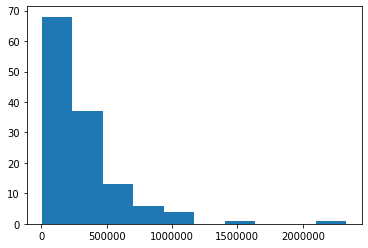

,Zip Code,Date,City,State,Median Sale Price
0,07649,1/31/17,Oradell,NJ,565000
1,22314,1/31/17,Alexandria,VA,414000
2,55425,2/28/17,Minneapolis,MN,115000
3,63050,2/28/17,Hillsboro,MO,203000
4,97330,2/28/17,Corvallis,OR,177000


In [79]:
#Descriptive info: Histogram (raw_home['Median Sale Price'])
print(raw_home.info())
print(raw_home.describe())
plt.hist(raw_home['Median Sale Price'])
plt.show()
raw_home.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71856 entries, 0 to 71855
Data columns (total 9 columns):
Date        71856 non-null object
Zip Code    71856 non-null object
City        71856 non-null object
State       71856 non-null object
0BR         71856 non-null int64
1BR         71856 non-null int64
2BR         71856 non-null int64
3BR         71856 non-null int64
4BR         71856 non-null int64
dtypes: int64(5), object(4)
memory usage: 4.9+ MB
None
                0BR           1BR           2BR           3BR           4BR
count  71856.000000  71856.000000  71856.000000  71856.000000  71856.000000
mean     812.157649    925.286267   1146.659291   1535.161991   1789.655144
std      376.142540    428.416891    522.595232    702.047985    819.862150
min      290.000000    290.000000    390.000000    500.000000    540.000000
25%      560.000000    630.000000    800.000000   1060.000000   1230.000000
50%      690.000000    790.000000    970.000000   1310.000000   1540.000000
75% 

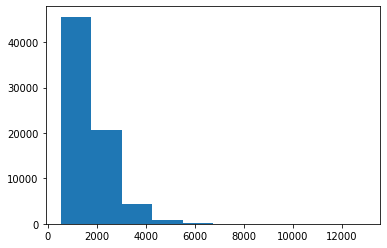

,Date,Zip Code,City,State,0BR,1BR,2BR,3BR,4BR
0,1/1/2017,00601,Adjuntas,PR,360,370,430,580,640
1,1/1/2017,00602,Aguada,PR,360,370,430,580,640
2,1/1/2017,00603,Aguadilla,PR,400,420,480,640,720
3,1/1/2017,00604,Aguadilla,PR,390,410,470,630,700
4,1/1/2017,00605,Aguadilla,PR,390,410,470,630,700


In [80]:
#Descriptive info: Histogram (raw_rent['4BR'])
print(raw_rent.info())
print(raw_rent.describe())
plt.hist(raw_rent['4BR'])
plt.show()
raw_rent.head()